### Linear Regression - Multiple

The notebook is an extension of the simple regression model in which multiple predictor variables are considered (Multiple Linear Regression model).

Multiple Linear Regression model is developed by using different combinations of predictor variables and changes in results are analyzed

In [1]:
### Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy
from matplotlib.pyplot import figure

#### Importing data and performing EDA (Exploratory Data Analysis)

In [2]:
data_url = "https://s3.amazonaws.com/projex.dezyre.com/fundamentals-simple-linear-regression-python-beginners/materials/EPL_Soccer_MLR_LR.csv"

df = pd.read_csv(data_url)

In [3]:
df.head(3)

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88


In [4]:
df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


In [5]:
df.corr()

<ipython-input-5-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


**Correlation Heatmap:**

Heatmap depicts a two dimensional correlation matrix between two discrete dimensions, with colored pixels representing data on colored scale.  The cell's hue is proportional to the number of measurements corresponding to the dimensional value.

They are great for data analysis since they show differences and variances in the same data while making patterns clearly accessible.


<ipython-input-7-b396f96d8491>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),


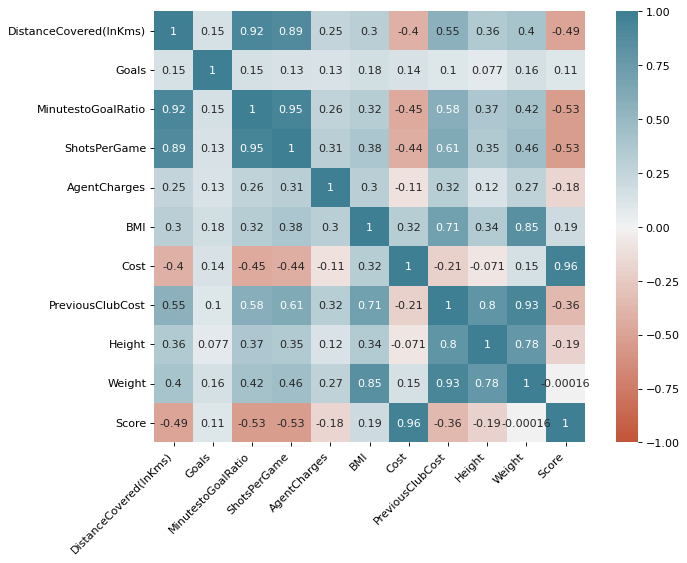

In [7]:
plt.figure(figsize=(10,7), dpi=80)

ax = sns.heatmap(
    df.corr(),
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment="right"
);

**Inference from the heatmap (regarding Score):**

* Weakly correlated variables can be removed from the model considerations (for e.g, Height and Weight)
* Some variables are correlated with each other as well (for e.g., MinutestoGoalRation & ShotsPerGame). When such variables are included in the model, it leads to multicollinearity

**Multicollinearity:**

When some of the independent variables are correlated with one another, it is known as multicollinearity. It is critical to examine them before creating the regression model.

**Issue with multicollinearity:**

Two independent variables correlated with one another help predict each other and the response / dependent variable. This makes analyzing their effects on the dependent variable challenging and as such, model becomes sensitive to changes in the data which shows an inflated effect on others

**Variance Inflation Factors (VIF)** determines the strength of the correlation between independent variable

VIF starts with the value of 1 which suggests that there is no correlation and the value of more then 5-10 for VIF indicates a sign of high multicollinearity and they can affect prediction models

**How to handle multicollinearity:**

* Remove some of the independent variables
* Linearly combine them
* Conduct dimensionality reduction (PCA - Principal Component Analysis or partial least squares regression)
* Make use of LASSO / Ridge regression techniques  


#### Linear Regression Model

In [8]:
### Selecting the required columns and spliting the data set to training & Testing data

X = df[["DistanceCovered(InKms)", "Goals", "ShotsPerGame", "AgentCharges", "BMI", "Cost", "PreviousClubCost"]]
y = df["Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 100)

In [9]:
lr = sm.OLS(y_train, X_train).fit()

print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Score   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              2353.
Date:                Mon, 25 Mar 2024   Prob (F-statistic):                   4.65e-145
Time:                        03:23:37   Log-Likelihood:                         -268.61
No. Observations:                 151   AIC:                                      551.2
Df Residuals:                     144   BIC:                                      572.3
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In the model summary above, the values of R<sup>2</sup> and Adjusted R<sup>2</sup> is uncentered. This is because the constant term is not added to the X-value and the uncentered R<sup>2</sup> values is not always the right indicator of the effectiveness of the model

In [10]:
X_train_intercept = sm.add_constant(X_train)

lr= sm.OLS(y_train, X_train_intercept).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     476.6
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           9.69e-96
Time:                        03:27:39   Log-Likelihood:                -252.91
No. Observations:                 151   AIC:                             521.8
Df Residuals:                     143   BIC:                             546.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

As seen above and comparing the value of the R<sup>2</sup> between the two models, we see a slight decrease in the values when the intercept is added to X.

Even though the value is decreased, the value is great and there is not much difference with the Adjusted R<sup>2</sup> value as well.



**Different combinations of Independent Variables with Linear Regression model**

In [11]:
X = df[["DistanceCovered(InKms)", "BMI", "Cost", "PreviousClubCost"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train_intercept = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_intercept).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     897.8
Date:                Mon, 25 Mar 2024   Prob (F-statistic):          1.14e-101
Time:                        03:43:25   Log-Likelihood:                -244.92
No. Observations:                 151   AIC:                             499.8
Df Residuals:                     146   BIC:                             514.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      7

The AIC and BIC both dropped even though we couldn't see much change in $R^2$. This suggest this model is better than the previous one.

**One-hot Encoding:**

Machine Learning Algorithms understand numbers and the categorical variables as a result have to be converted to numbers before passing them to the ML model. This is where one-hot encoding comes into picture.

In one-hot encoding, we build a new feature for each of the labels and then assign it a value of 1.

For e.g., if blue is the value, then it is marked as 1, else it is marked as 0

$Pandas$ has a function `get_dummies()` which can be used for this purpose

In [13]:
### Using get_dummies() for one-hot encoding

clubs =set(df.Club)

clubs_features = pd.get_dummies(df['Club'])

clubs_features.head()

,CHE,LIV,MUN
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [14]:
### Adding the one-hot encoded  data frame to the original dataframe

df_encoded = pd.concat([df, clubs_features], axis = 1)
df_encoded.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score,CHE,LIV,MUN
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75,0,0,1
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30,0,0,1
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88,0,0,1
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66,0,0,1
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64,0,0,1


In [17]:
### Linear regression model with the one-hot encoded columns also included as the predicted variables
X = df_encoded[['DistanceCovered(InKms)', 'BMI', 'Cost', 'PreviousClubCost', 'CHE', 'LIV', 'MUN']]
y = df_encoded['Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

X_train_intercept = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_intercept).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     691.4
Date:                Mon, 25 Mar 2024   Prob (F-statistic):          1.79e-103
Time:                        05:19:41   Log-Likelihood:                -237.58
No. Observations:                 151   AIC:                             489.2
Df Residuals:                     144   BIC:                             510.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

Adding the club feature marginally improved the performance of the model with a slight decrease in AIC & BIC

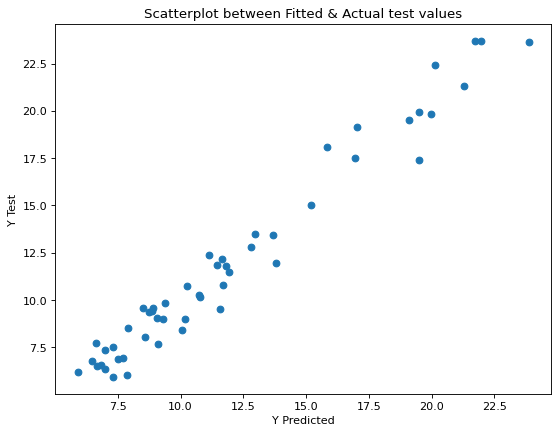

In [18]:
### Plotting the scatterplot - Fitted values vs actual test values

plt.figure(figsize=(8, 6), dpi=80)

X_test_intercept = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_intercept)

plt.scatter(y_test_pred, y_test)

plt.xlabel("Y Predicted")
plt.ylabel("Y Test")
plt.title("Scatterplot between Fitted & Actual test values")
plt.show()

We can see the scatter plot shows linear correlation between fitted and actual values!

**Bias - Variance Tradeoff**

**Bias**

* Difference between model's prediction of the values and the correct value
* Causes substantial inaccuracy in both training and test data
* Is also called underfitting (when the assumption is overly simple or linear)

**Variance**

* Variability of model prediction for a particular data point (dispersion of the data)
* Models perform well on training data but have substantial error rates on test data
* Often referred as overfitting of the data
* Basically tries to memorize the patterns in training data and performs poorly when unseen data is presented


We have to find a sweet spot, a model complexity which returns the minimum or optimal error. This tradeoff is known as Bias - Variance TradeOff.